In [1]:
# Import configuration
from src.sim import run

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

[{'N': 1, 'T': range(0, 100), 'M': {'MARKETING_STEADY': 500, 'MARKETING_SHOCK_MAG': 1234, 'MARKETING_SHOCK_FREQ': 2, 'EXO_EXPERIENCE': 140, 'SOURCE_POOL': 100000, 'THRESHOLD': 3, 'LEAK_COEFFICIENT': 0.025}}]


In [2]:
experiments = run.run()


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x000001EA444CF080>]
Configurations: [<cadCAD.configuration.Configuration object at 0x000001EA444CF080>]


In [3]:
print(experiments.dataset[0].head())

   timestamp  signal                                               pool  run  \
0 2020-01-01       0  <class 'src.sim.model.utils.Adoption_Pool'>: {...    1   
2 2020-01-01     500  <class 'src.sim.model.utils.Adoption_Pool'>: {...    1   
4 2020-01-01     500  <class 'src.sim.model.utils.Adoption_Pool'>: {...    1   
6 2020-01-01     500  <class 'src.sim.model.utils.Adoption_Pool'>: {...    1   
8 2020-01-01     500  <class 'src.sim.model.utils.Adoption_Pool'>: {...    1   

   substep  timestep  
0        0         0  
2        2         1  
4        2         2  
6        2         3  
8        2         4  


In [5]:
first_experiment = experiments.dataset[0]

In [6]:
len(first_experiment)

101

In [7]:
print(first_experiment.pool[0])

<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': 100000, 'reputation': None}, 'aware': {'pool': 0, 'reputation': 0}, 'adopted': {'pool': 0, 'reputation': 0}, 'loyal': {'pool': 0, 'reputation': 0}, 'churned': {'pool': 0, 'reputation': 0}}, 'threshold': 0.5}


In [8]:
print(first_experiment.pool[2])

<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': 100000, 'reputation': 1, 'neg_drip': 5000.0}, 'aware': {'pool': 0, 'reputation': 0, 'neg_drip': -0.0}, 'adopted': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': -0.0}}, 'threshold': 3}


In [9]:
print(first_experiment.pool[4])

<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': 100000, 'reputation': 2, 'neg_drip': 2500.0}, 'aware': {'pool': 0, 'reputation': 0, 'neg_drip': -0.0}, 'adopted': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': -0.0}}, 'threshold': 3}


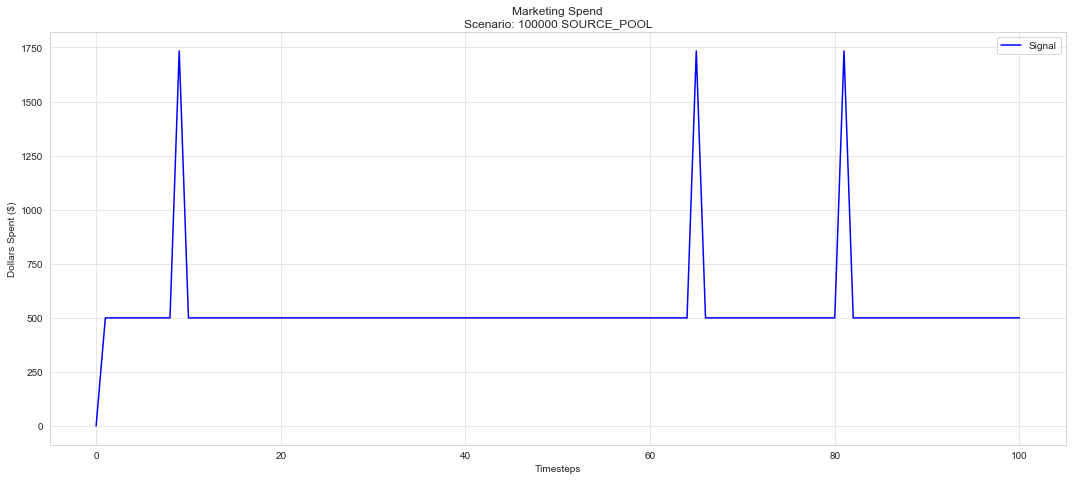

In [15]:
experiments = experiments.sort_values(by =['SOURCE_POOL']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['SOURCE_POOL']
    cc_label = experiments.iloc[cc_idx]['SOURCE_POOL']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['SOURCE_POOL']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()

#         for key, value in df.pool.items(): #state.items():
#             print('key',key,'value',value)
#             for keys, values in value.items(): #state.items():
#                 print('keys',keys,'values',values)

#         df['unaware'] = df.pool.apply(lambda x: np.array(x.state['unaware']['pool']))
#         df['aware'] = df.pool.apply(lambda x: np.array(x.state['aware']['pool']))
#         df['adopted'] = df.pool.apply(lambda x: np.array(x.state['adopted']['pool']))
#         df['loyal'] = df.pool.apply(lambda x: np.array(x.state['loyal']['pool']))
#         df['churned'] = df.pool.apply(lambda x: np.array(x.state['churned']['pool']))

    
    
#             print(df[key])
#         df['adopt_state'] = df.adoption.apply(lambda x: np.array(x.state))


#         df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        
#         df_j = df.groupby('timestep').agg({'j_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['SOURCE_POOL']
        ax = axs
        title = 'Marketing Spend' + '\n' + 'Scenario: ' + str(cc_label)  + ' SOURCE_POOL'
        ax.set_title(title)
        ax.set_ylabel('Dollars Spent ($)')
        colors = ['b','orange', 'g', 'magenta', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df.timestep, df['signal'],color = colors[0], label='Signal')



        ax.legend()
#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

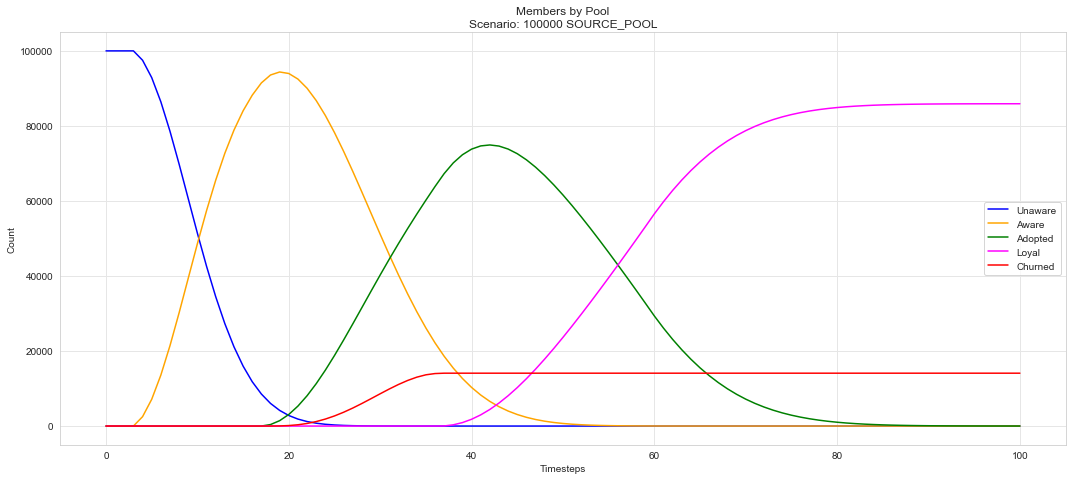

In [10]:
experiments = experiments.sort_values(by =['SOURCE_POOL']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['SOURCE_POOL']
    cc_label = experiments.iloc[cc_idx]['SOURCE_POOL']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['SOURCE_POOL']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        
#         for key, value in df.pool.items(): #state.items():
#             print('key',key,'value',value)
#             for keys, values in value.items(): #state.items():
#                 print('keys',keys,'values',values)

        df['unaware'] = df.pool.apply(lambda x: np.array(x.state['unaware']['pool']))
        df['aware'] = df.pool.apply(lambda x: np.array(x.state['aware']['pool']))
        df['adopted'] = df.pool.apply(lambda x: np.array(x.state['adopted']['pool']))
        df['loyal'] = df.pool.apply(lambda x: np.array(x.state['loyal']['pool']))
        df['churned'] = df.pool.apply(lambda x: np.array(x.state['churned']['pool']))

    
    
#             print(df[key])
#         df['adopt_state'] = df.adoption.apply(lambda x: np.array(x.state))


#         df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        
#         df_j = df.groupby('timestep').agg({'j_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['SOURCE_POOL']
        ax = axs
        title = 'Members by Pool' + '\n' + 'Scenario: ' + str(cc_label)  + ' SOURCE_POOL'
        ax.set_title(title)
        ax.set_ylabel('Count')
        colors = ['b','orange', 'g', 'magenta', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df.timestep, df['unaware'],color = colors[0], label='Unaware')
        ax.plot(df.timestep, df['aware'],color = colors[1], label='Aware')
        ax.plot(df.timestep, df['adopted'],color = colors[2], label='Adopted')
        ax.plot(df.timestep, df['loyal'],color = colors[3], label='Loyal')
        ax.plot(df.timestep, df['churned'],color = colors[4], label='Churned')


        ax.legend()
#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

#         ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

### State Transition Table

| Current State    |  Input | Next State     |  Threshold | Output Reputation  |Output Activity  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|:-----:|
|Unaware |Marketing Signal     |Unaware    | Not Exceeded | Empty $\emptyset$      |None      |
|Unaware |Marketing Signal     |Aware    | Exceeded | Exists $\exists$     | None      |
|Aware    | Reputation    |Aware    | Not Exceeded | Exists $\exists$       |None      |
|Aware    | Reputation    |Adopted    | Exceeded | Positive (+)     |None      |
|Adopted    | Experience    |Adopted    | Not Exceeded | Positive (+)      |Some      |
|Adopted    | Experience    |Loyal    | Exceeded | Positive  (+)      |Increased      |
|Adopted    | Experience    |Churned    | Lower Limit Exceeded | Negative  (-)    | Decreased      |
|Loyal    | Experience    |Loyal    | Exceeded | Positive (++)     | Increased      |
|Loyal    | Experience    |Adopted    | Lower Limit Exceeded | Positive (+)      | Decreased      |
|Churned    | Reputation    |Churned    | Lower Limit Exceeded | Negative (-)      | None      |
|Churned    | Reputation    |Adopted    |  Exceeded | Positive (+)      | None     |



#### Drip Function
$$ \Delta{V} = \delta \cdot (V_C \times \mu_C -  V_C  \times \mu_{\tau}) $$

#### Current State
$$ V_C = V_C - \Delta{V} $$
$$ \mu_C =  \mu_C - \delta \cdot \mu_C $$

#### Next State
$$ V_N = V_N + \Delta{V} $$